In [ ]:
# 1. import the necessary packages for analysis and visualization

In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 2. set up a connection to the SQLite database

In [2]:
conn = sql.connect('adventure works new.db')

In [ ]:
# 3.Query data from the database

In [5]:
query ='''SELECT ProductKey, CategoryName, OrderValue, OrderDate
from Demographics_update
where OrderDate BETWEEN '1/1/2015' AND '31/12/2015' '''

In [ ]:
# 4. Load the data into Pandas DataFrame

In [7]:
sales_data = pd.read_sql_query(query,conn)

In [ ]:
# 5.  Preprocessing the Data
# Convert OrderDate to datetime

In [9]:
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'])

In [ ]:
# Add a column for year and month

In [11]:
sales_data['Year'] = sales_data['OrderDate'].dt.year
sales_data['Month'] = sales_data['OrderDate'].dt.month

In [ ]:
# 6. Analyze Sales Distribution
# Convert OrderValue to numeric value
# Group ProductKey and Sum OrderValue to get sales distribution

In [15]:
sales_data['OrderValue'] = pd.to_numeric(sales_data['OrderValue'], errors='coerce')

In [83]:
sales_distribution= sales_data.groupby('ProductKey')['OrderValue'].sum().reset_index()

In [ ]:
# Plot Sales Distribution by Product

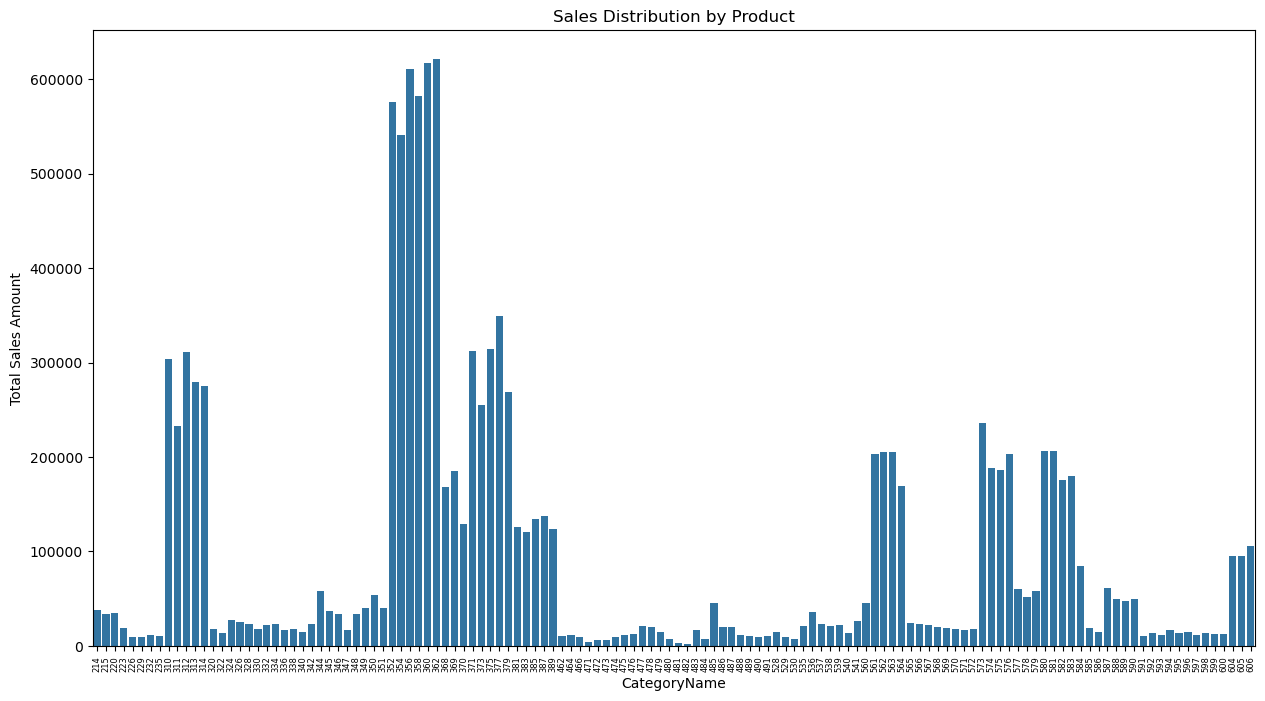

In [87]:
plt.figure(figsize=(15, 8))
sns.barplot(data=sales_distribution, x='ProductKey' , y='OrderValue')
plt.title('Sales Distribution by Product')
plt.xlabel('CategoryName')
plt.ylabel('Total Sales Amount')
plt.xticks( rotation = 90, fontsize = 6)
plt.savefig('Sales Distribution by Product.png', dpi=300)
plt.show()

In [ ]:
# the above visualization is a plot ofthe product sales distribution. product with the highest value is Product 362 and with the lowest value is Product 482

In [ ]:
# 7. Product Life Cycle Analysis
# Group by year and Product to analyse sales over time

In [81]:
product_trends = sales_data.groupby(['ProductKey', 'Year'])['OrderValue'].sum().reset_index()

In [ ]:
# Plot product life cycle for all the Products

In [107]:
product_lifecycle =product_trends 

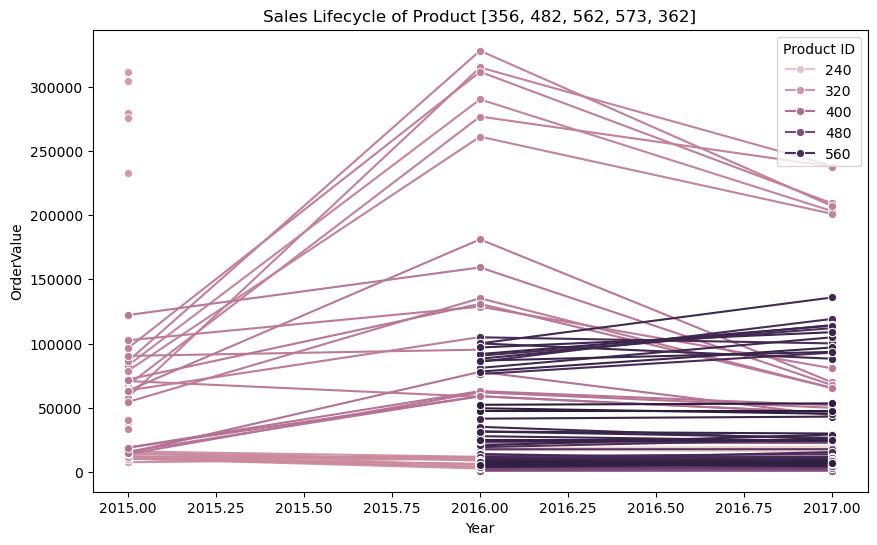

In [109]:
plt.figure(figsize = (10, 6))
sns.lineplot(data= product_lifecycle, x='Year', y='OrderValue', hue='ProductKey', marker = 'o')
plt.title(f'Sales Lifecycle of Product {product_ids}')
plt.xlabel('Year')
plt.ylabel('OrderValue')
plt.legend(title='Product ID')
plt.savefig('Sales Lifecycle of Product.png', dpi=300)
plt.show()

In [ ]:
# 8. Product Performance Summary
# Calculating performance metrics like total sales and Sales duration(growth rate)

In [111]:
product_performance = sales_data.groupby('ProductKey').agg(
    TotalSales=pd.NamedAgg(column = 'OrderValue', aggfunc = 'sum'),
    FirstSale=pd.NamedAgg(column = 'OrderDate', aggfunc='min'),
    LastSale = pd.NamedAgg(column = 'OrderDate', aggfunc='max')
)
product_performance['SalesDuration'] = (product_performance['LastSale'] - product_performance['FirstSale']).dt.days
print(product_performance.head())

            TotalSales  FirstSale   LastSale  SalesDuration
ProductKey                                                 
214           38419.02 2016-10-01 2017-03-31            181
215           33606.36 2016-10-01 2017-03-31            181
220           34481.00 2016-10-01 2017-03-31            181
223           18913.82 2016-10-01 2017-03-31            181
226            9998.56 2016-10-01 2017-03-30            180


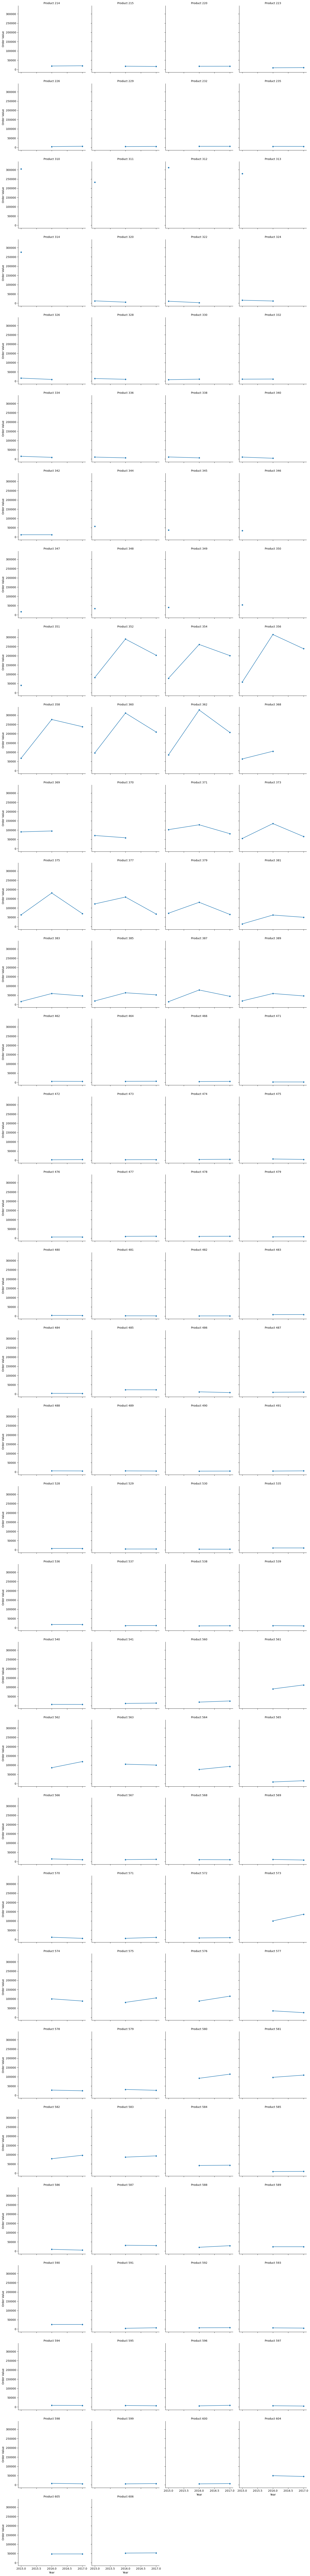

In [134]:
g = sns.FacetGrid(product_lifecycle, col='ProductKey', col_wrap=4, height=4)

g.map(sns.lineplot, 'Year', 'OrderValue', marker='o')

g.set_axis_labels("Year", "Order Value")
g.set_titles("Product {col_name}")

plt.tight_layout()
plt.savefig('Product Life cycles.png', dpi = 300)
plt.show()

In [ ]:
# Above visualization contains the growth rate of the various products as individual graphs. Some products show a rise and fall in the lines marking their growth, its peak as well as the decline of such procducts 
# Some products also show a straight or slightly diagonal horizontal line showing less noticable changes in their growth rate 
# The years are divided into two halves as an example 2015.0 and 2015.5 in 2015

In [ ]:
# Import additional libraries

In [122]:
import numpy as py

In [ ]:
# 9. Product Segmentation
# Segment Product based on total sales

In [124]:
sales_per_product = sales_data.groupby('ProductKey')['OrderValue'].sum().reset_index()
high_sales_threshold = sales_per_product['OrderValue'].quantile(0.75)  # Top 25%
low_sales_threshold = sales_per_product['OrderValue'].quantile(0.25)   # Bottom 25%


In [ ]:
# Categorizing products into High, Medium, Low Sales

In [128]:
def categorize_sales(amount):
    if amount >= high_sales_threshold:
        return 'High Sales'
    elif amount <= low_sales_threshold:
        return 'Low Sales'
    else:
        return 'Medium Sales'

sales_per_product['SalesCategory'] = sales_per_product['OrderValue'].apply(categorize_sales)


In [ ]:
# Merge back with Original sales data

In [130]:
sales_data = sales_data.merge(sales_per_product[['ProductKey', 'SalesCategory']], on='ProductKey')

In [ ]:
# Analyze sales performance by category

In [132]:
category_performance = sales_data.groupby('SalesCategory')['OrderValue'].sum().reset_index()

In [ ]:
# Plotting sales performance by Category

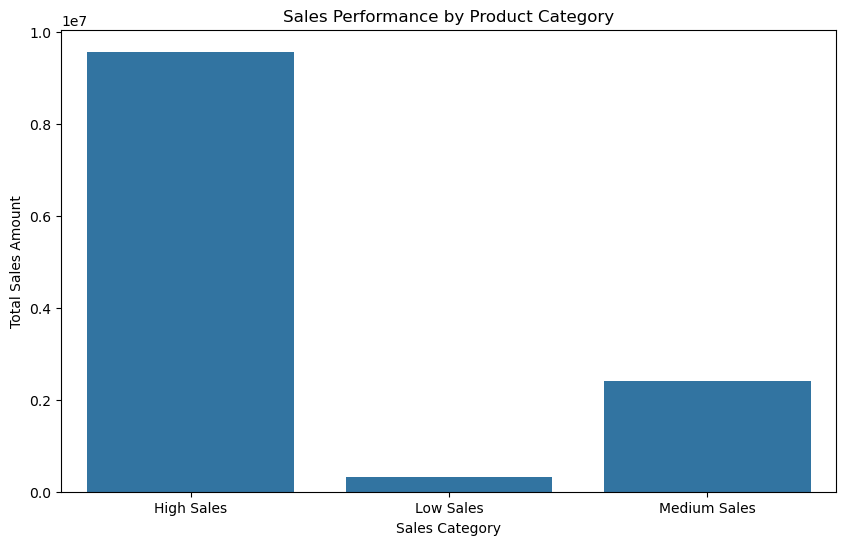

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_performance, x='SalesCategory', y='OrderValue')
plt.title('Sales Performance by Product Category')
plt.xlabel('Sales Category')
plt.ylabel('Total Sales Amount')
plt.savefig('Sales Performance by Product Catergory.png')
plt.show()

In [ ]:
# from the visualization above it can be seen that product sales in the upper percentile take up most of the market share meaning people in the data set are high spenders, the next group are the mid spenders and coming in last are the low spenders which lead to ower sales

In [ ]:
# 10. Seasonal Trends
# Grouping sales data by month and year

In [140]:
monthly_sales = sales_data.groupby(['Year', 'Month'])['OrderValue'].sum().reset_index()

In [ ]:
# Creating Datetime by Month and Year

In [142]:
monthly_sales['OrderDate'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

In [ ]:
#Plotting seasonal trends

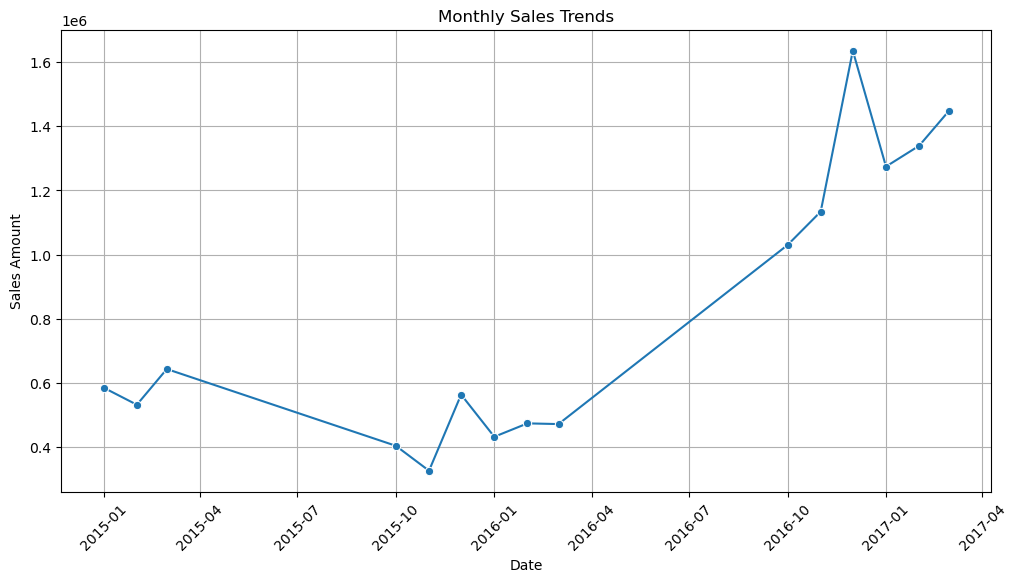

In [160]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='OrderDate', y='OrderValue', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('Monthly Sales Trend.png')
plt.show()

In [ ]:
# Visualization above shows the monthly trend in sales
# The sales trend shows it lowest point at 2015-11(ie.November 2015)
# The sales trend shows its highest point at 2016-12(ie.December 2016)
# The sales trend shows an overall upward trend across the months

In [ ]:
# 11. Seasonal Analysis by Product Category
# Grouping by month and Product Category

In [162]:
monthly_category_sales = sales_data.groupby(['Year', 'Month', 'CategoryName'])['OrderValue'].sum().reset_index()

In [ ]:
# Converting OrderDate to datetime format

In [166]:
monthly_category_sales['OrderDate'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

In [ ]:
# Plotting seasonal trend for each product category

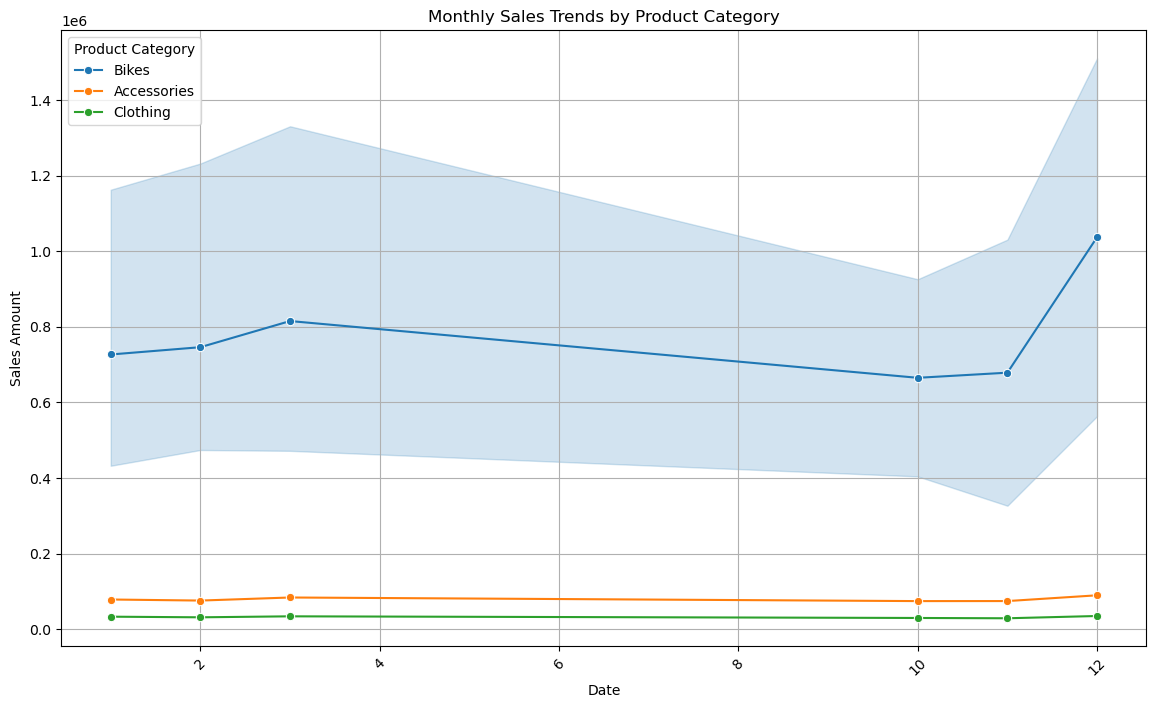

In [170]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_category_sales, x='Month', y='OrderValue', hue='CategoryName', marker='o')
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Product Category')
plt.savefig('Monthly Sales Trends by Product Category.png')
plt.show()

In [ ]:
# This visualization shows the performance of the various product categories based of the months with Bikes performing better than othe product catergories.
# There is peak performance in the month of Decembee as shown by a sharp increase in the elevation of the line for Bikes and a slight one for other categories.